# Oleh: Ridho Nur Rohman Wijaya

# Import Modul

In [1]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ambil Data

In [2]:
df_train = pd.read_csv('train (1).csv')
df_test = pd.read_csv('test (1).csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Keterangan:** <br>
Pada permasalahan ini, data test tidak digunakan, karena kebenarannya belum diketahui

## Preprocessing Data Train

### Cek data kosong

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Kesimpulan:**
1. Isi kolom 'Age' dengan rata-rata atau median.
2. Isi kolom 'Embarked' dengan data terbanyak atau data terkecil.
3. Buang kolom 'Cabin', sebab terlalu banyak data kosong.
4. Buang kolom 'PassengerId', 'Name', dan 'Tiket' karena tidak dibutuhkan.

In [6]:
df_train_new = df_train.drop(columns=["PassengerId","Name","Ticket","Cabin"])
df_train_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Cek frekuensi data

In [7]:
df_train_new.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train_new.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Isi data kosong

In [9]:
df_train_new = df_train_new.fillna(value={"Age" : df_train_new.Age.mean(), "Embarked" : "C"})

In [10]:
# Cek data
df_train_new.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


#### Encode data non numerik

In [11]:
df_train_new = pd.get_dummies(df_train_new)

In [12]:
# Cek data
df_train_new.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1


# Buat Model SVM

### Persiapan Data

In [13]:
features = df_train_new.iloc[:,1:].values
target = df_train_new.iloc[:,0].values

#### Bagi data latih dan validasi

In [14]:
x_train, x_valid, y_train, y_valid = train_test_split(features, target, test_size=0.2, random_state=42)

### Buat Model

In [15]:
model1 = SVC()
model1.fit(x_train, y_train)

model2 = SVC(kernel = "poly", random_state=42)
model2.fit(x_train, y_train)

model3 = SVC(tol=0.0001, random_state=42)
model3.fit(x_train, y_train)

model4 = SVC(C=1000, random_state=42)
model4.fit(x_train, y_train)

SVC(C=1000, random_state=42)

### Prediksi

In [16]:
y_pred1 = model1.predict(x_valid)
y_pred2 = model2.predict(x_valid)
y_pred3 = model3.predict(x_valid)
y_pred4 = model4.predict(x_valid)

acc1 = accuracy_score(y_valid, y_pred1)
acc2 = accuracy_score(y_valid, y_pred2)
acc3 = accuracy_score(y_valid, y_pred3)
acc4 = accuracy_score(y_valid, y_pred4)

acc_valid = [acc1, acc2, acc3, acc4]

### Cek hasil prediksi dan visualisasi

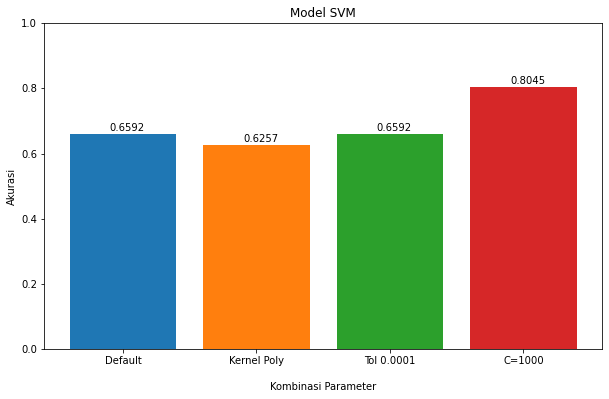

In [17]:
plt.figure(figsize=(10,6))
xlabels = ["Default", "Kernel Poly", 
           "Tol 0.0001", "C=1000"]
for i in range(len(xlabels)):
    plt.bar(xlabels[i], acc_valid[i])
    plt.text(i-0.1, acc_valid[i]+0.01, round(acc_valid[i], 4))

plt.ylim([0,1])
plt.title("Model SVM")
plt.ylabel("Akurasi")
plt.xlabel("\nKombinasi Parameter")
plt.show()

**Kesimpulan:** <br>
Dari 4 kombinasi parameter-parameter yang ada, hasil paling bagus jika dipengaruhi oleh C, yaitu 80,45 %